<a href="https://colab.research.google.com/github/OYOO-DA/pytorch/blob/main/Impimenting_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch#pytorch
import torch.nn as nn# nural net
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
#writing models class funtionthat inherits the nn
class Model(nn.Module):
  #inputfeatures 1 layer -->
  #1 hidden layer -->
  #output layer
  def __init__(self,input_features=4,h1=8,h2=8,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(input_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [4]:
#random seed
torch.manual_seed(42)
model=Model()#setting the instance

In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [6]:
my_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#changing the speciec to nunerical
my_df['species']=my_df['species'].map({'setosa':0.0,'versicolor':0.1,'virginica':0.2})

In [8]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
#Train splitting the data
x=my_df.drop('species',axis=1)
y=my_df['species']

In [10]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
X=x.values#converting dataframe to numpy arrays
y=y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
#mport train_test_split
from sklearn.model_selection import train_test_split

In [14]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#convert the x features from arrays to floet tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [16]:
#convert the y labels to tensor long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [17]:
#set the criterion of the model
criterion=nn.CrossEntropyLoss()
#choose the adam optimizer and set the learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
#training our model
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.4729706048965454
Epoch: 10 and loss: 1.0060395002365112
Epoch: 20 and loss: 0.6054977774620056
Epoch: 30 and loss: 0.12344957143068314
Epoch: 40 and loss: 0.0104661351069808
Epoch: 50 and loss: 0.0019124026875942945
Epoch: 60 and loss: 0.0008202644530683756
Epoch: 70 and loss: 0.0005544799496419728
Epoch: 80 and loss: 0.000458204944152385
Epoch: 90 and loss: 0.0004112198075745255


Text(0.5, 0, 'Epoch')

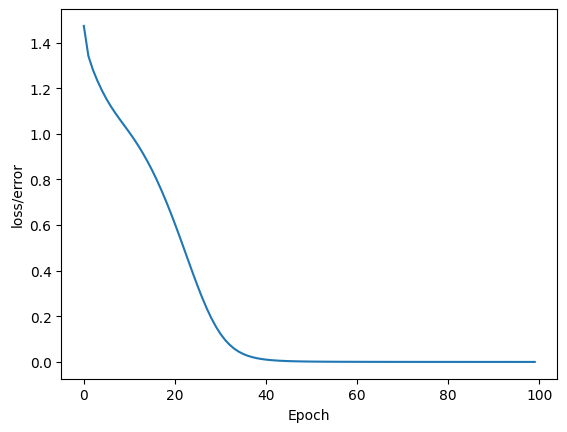

In [19]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [20]:

# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [21]:
loss


tensor(0.0003)

In [22]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')


1.)  tensor([ 7.7287, -6.1126, -2.1009]) 	 0 	 0
2.)  tensor([ 6.1741, -5.0122, -1.7281]) 	 0 	 0
3.)  tensor([ 9.9881, -7.7118, -2.6428]) 	 0 	 0
4.)  tensor([ 7.6811, -6.0789, -2.0895]) 	 0 	 0
5.)  tensor([ 8.2901, -6.5100, -2.2355]) 	 0 	 0
6.)  tensor([ 5.8142, -4.7575, -1.6418]) 	 0 	 0
7.)  tensor([ 6.9721, -5.5770, -1.9194]) 	 0 	 0
8.)  tensor([ 8.8030, -6.8730, -2.3585]) 	 0 	 0
9.)  tensor([ 7.6375, -6.0480, -2.0790]) 	 0 	 0
10.)  tensor([ 7.1577, -5.7084, -1.9640]) 	 0 	 0
11.)  tensor([ 8.4825, -6.6461, -2.2817]) 	 0 	 0
12.)  tensor([ 5.1916, -4.3168, -1.4925]) 	 0 	 0
13.)  tensor([ 5.7656, -4.7231, -1.6301]) 	 0 	 0
14.)  tensor([ 5.3265, -4.4123, -1.5248]) 	 0 	 0
15.)  tensor([ 5.6892, -4.6690, -1.6118]) 	 0 	 0
16.)  tensor([ 8.0945, -6.3715, -2.1886]) 	 0 	 0
17.)  tensor([ 8.7890, -6.8631, -2.3552]) 	 0 	 0
18.)  tensor([ 6.9478, -5.5598, -1.9136]) 	 0 	 0
19.)  tensor([ 7.4033, -5.8823, -2.0229]) 	 0 	 0
20.)  tensor([ 8.5855, -6.7191, -2.3064]) 	 0 	 0
21.)  ten

In [23]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [24]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 5.1590, -4.2938, -1.4846])


In [25]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [26]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<ipython-input-26-f4376919f48a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [27]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)